# Haberman Cancer Survival dataset


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading the Haberman.csv into a pandas dataframe
names = ['Age', 'operation_year', 'axillary_nodes_detected', 'survival_status'] 
Haberman = pd.read_csv("haberman.csv", names = names) # added the column names

In [2]:
# Total data-points and features
print(Haberman.shape)

(306, 4)


In [10]:
# Total column names
print(Haberman.columns)

Index(['Age', 'operation_year', 'axillary_nodes_detected', 'survival_status'], dtype='object')


2    81
Name: survival_status, dtype: int64

In [56]:
# Here, I am separating the classes into separate dataframes
# We have two classes here i.e '1' and '2'
Haberman_Negative = Haberman[Haberman['survival_status'] == 1]
Haberman_Positive = Haberman[Haberman['survival_status'] == 2]
print(Haberman_Positive['survival_status'].value_counts())
print(Haberman_Negative['survival_status'].value_counts())
#df = Haberman[Haberman['axillary_nodes_detected'] == 4]
#df['axillary_nodes_detected'].value_counts()

2    81
Name: survival_status, dtype: int64
1    225
Name: survival_status, dtype: int64


In [26]:
### Top five rows
print(Haberman.head())

   Age  operation_year  axillary_nodes_detected  survival_status
0   30              64                        1                1
1   30              62                        3                1
2   30              65                        0                1
3   31              59                        2                1
4   31              65                        4                1


In [5]:
# Bottom five rows
print(Haberman.tail())

     Age  operation_year  axillary_nodes_detected  survival_status
301   75              62                        1                1
302   76              67                        0                1
303   77              65                        3                1
304   78              65                        1                2
305   83              58                        2                2


In [6]:
Haberman["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [7]:
# Haberman["survival_status"] = Haberman["survival_status"].apply(lambda x : 'Positive' if x == 2 else 'Negative')
Haberman["survival_status"] = np.where(Haberman["survival_status"].astype(int) == 2,
                                       'Positive','Negative')
# Haberman = Haberman.astype(int)
# d = {2: 'Positive', 1: 'Negative'}
# Haberman['survival_status'] = Haberman['survival_status'].map(d)

Haberman['survival_status'].value_counts()


Negative    225
Positive     81
Name: survival_status, dtype: int64

# 2-D Scatter plots


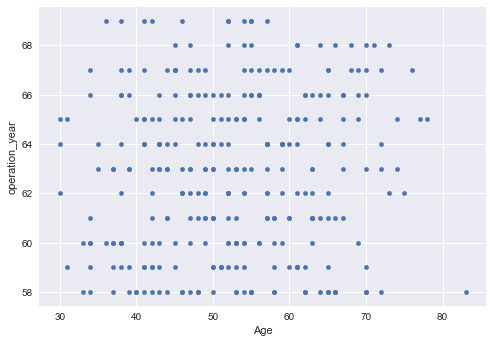

In [8]:
# I am using two features i.e; Age and operation_year to make a scatter plot
Haberman.plot(kind='scatter', x='Age', y='operation_year') ;
plt.show()


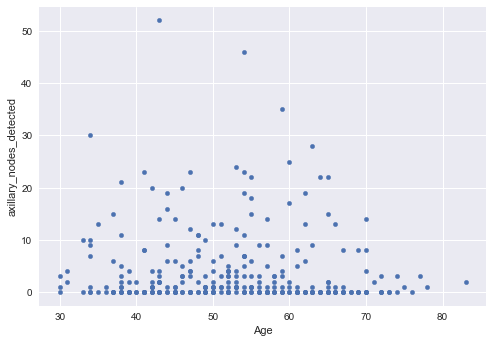

In [9]:
# I am using Age and axillary_nodes_detected to make a scatter_plot
Haberman.plot(kind='scatter', x='Age', y='axillary_nodes_detected');
plt.show()

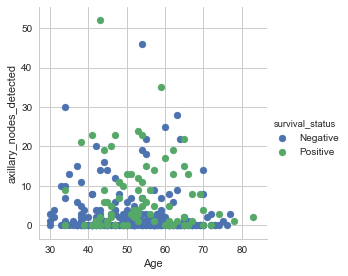

In [10]:
# 2-D Scatter plot with color-coding for each survival_status/class.
# Here 'sns' corresponds to seaborn.
sns.set_style("whitegrid");
sns.FacetGrid(Haberman, hue = "survival_status", size = 4).map(plt.scatter, "Age", "axillary_nodes_detected").add_legend();
plt.show();


# Pair-Plots

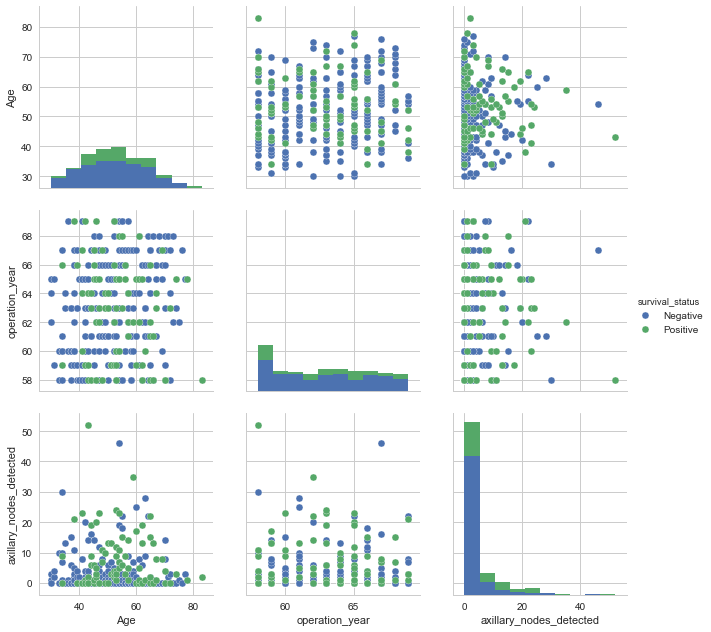

In [11]:

plt.close();
sns.set_style("whitegrid");
sns.pairplot(Haberman, hue="survival_status", size=3);
plt.show()


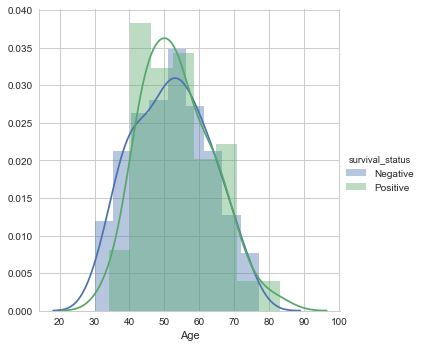

In [12]:
sns.FacetGrid(Haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();


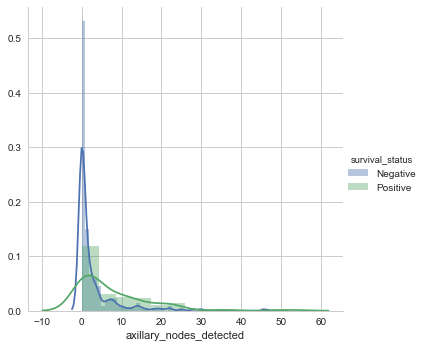

In [13]:
sns.FacetGrid(Haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "axillary_nodes_detected") \
   .add_legend();
plt.show();

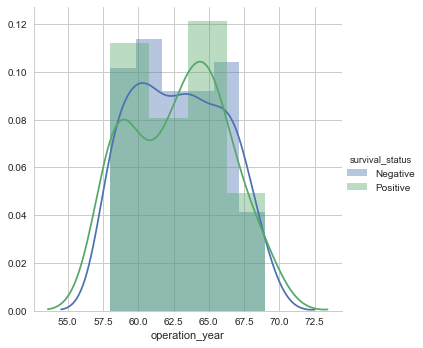

In [14]:
sns.FacetGrid(Haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "operation_year") \
   .add_legend();
plt.show();

[ 0.39506173  0.17283951  0.0617284   0.08641975  0.04938272  0.08641975
  0.01234568  0.03703704  0.0617284   0.01234568  0.          0.          0.
  0.01234568  0.          0.          0.          0.          0.
  0.01234568]
[  0.    2.6   5.2   7.8  10.4  13.   15.6  18.2  20.8  23.4  26.   28.6
  31.2  33.8  36.4  39.   41.6  44.2  46.8  49.4  52. ]


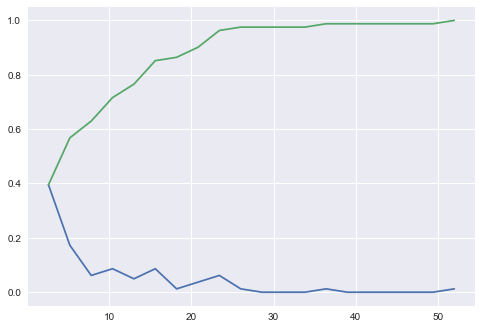

In [63]:
# Positive class
# Cumulative Distribution Function (CDF)
counts, bin_edges = np.histogram(Haberman_Positive['axillary_nodes_detected'], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


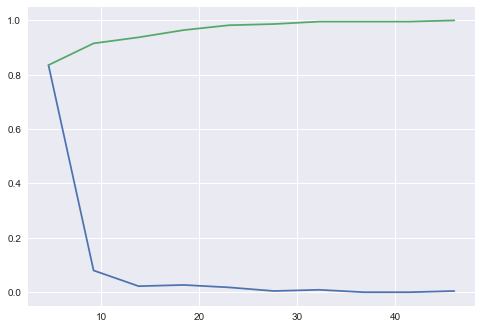

In [20]:
# Negative class
counts, bin_edges = np.histogram(Haberman_Negative['axillary_nodes_detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();

[ 0.39506173  0.17283951  0.0617284   0.08641975  0.04938272  0.08641975
  0.01234568  0.03703704  0.0617284   0.01234568  0.          0.          0.
  0.01234568  0.          0.          0.          0.          0.
  0.01234568]
[  0.    2.6   5.2   7.8  10.4  13.   15.6  18.2  20.8  23.4  26.   28.6
  31.2  33.8  36.4  39.   41.6  44.2  46.8  49.4  52. ]
[ 0.73333333  0.10222222  0.02666667  0.05333333  0.01333333  0.00888889
  0.02222222  0.00444444  0.00888889  0.00888889  0.00444444  0.
  0.00444444  0.00444444  0.          0.          0.          0.          0.
  0.00444444]
[  0.    2.3   4.6   6.9   9.2  11.5  13.8  16.1  18.4  20.7  23.   25.3
  27.6  29.9  32.2  34.5  36.8  39.1  41.4  43.7  46. ]


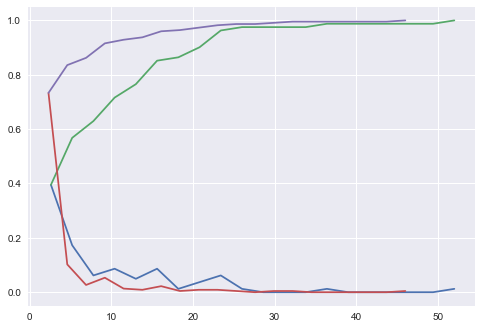

In [64]:
# Positive class
counts, bin_edges = np.histogram(Haberman_Positive['axillary_nodes_detected'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Negative class
counts, bin_edges = np.histogram(Haberman_Negative['axillary_nodes_detected'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

# Mean, Variance and standard-deviation

In [39]:
# Mean
print('The following are the Means :')
print('Mean of Negative class :',np.mean(Haberman_Negative['axillary_nodes_detected']))
print('Mean of Positive class :',np.mean(Haberman_Positive['axillary_nodes_detected']))

# Standard deviation
print('\nThe following are the standard deviations : ')
print('std of Negative class :',np.std(Haberman_Negative['axillary_nodes_detected']))
print('std of Positive class :',np.std(Haberman_Positive['axillary_nodes_detected']))

The following are the Means :
Mean of Negative class : 2.7911111111111113
Mean of Positive class : 7.45679012345679

The following are the standard deviations : 
std of Negative class : 5.857258449412131
std of Positive class : 9.128776076761632


# Median, Percentile, Quantile, IQR , MAD

In [60]:
# Medians
print('The following are the Medians : ')
print('Meadian of Negative class :',np.median(Haberman_Negative['axillary_nodes_detected']))
print('Meadian of Positive class :',np.median(Haberman_Positive['axillary_nodes_detected']))

print("\nQuantiles:")
print('\npercentiles of Negative class :',np.percentile(Haberman_Negative["axillary_nodes_detected"],np.arange(0, 100, 25)))
print('\npercentiles of Positive class :',np.percentile(Haberman_Positive["axillary_nodes_detected"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print('\nNegative class :',np.percentile(Haberman_Negative["axillary_nodes_detected"],90))
print('\nPositive class :',np.percentile(Haberman_Positive["axillary_nodes_detected"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print('\nNegative class :',robust.mad(Haberman_Negative["axillary_nodes_detected"]))
print('\nPositive class :',robust.mad(Haberman_Positive["axillary_nodes_detected"]))

The following are the Medians : 
Meadian of Negative class : 0.0
Meadian of Positive class : 4.0

Quantiles:

percentiles of Negative class [ 0.  0.  0.  3.]

percentiles of Positive class [  0.   1.   4.  11.]

90th Percentiles:

Negative class 8.0

Positive class 20.0

Median Absolute Deviation

Negative class 0.0

Positive class 5.93040887402


In [52]:
Haberman_Negative.describe()

,Age,operation_year,axillary_nodes_detected,survival_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [53]:
Haberman_Positive.describe()

,Age,operation_year,axillary_nodes_detected,survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# Box-Plots and Whiskers

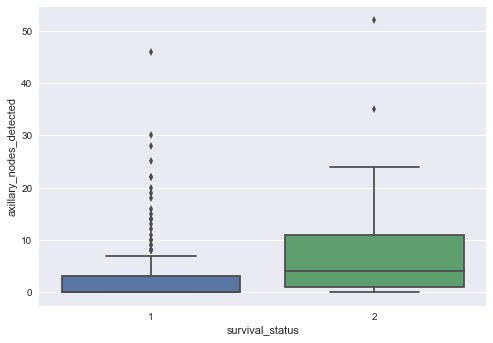

In [61]:
sns.boxplot(x='survival_status',y='axillary_nodes_detected', data=Haberman)
plt.show()

# Violin-Plots

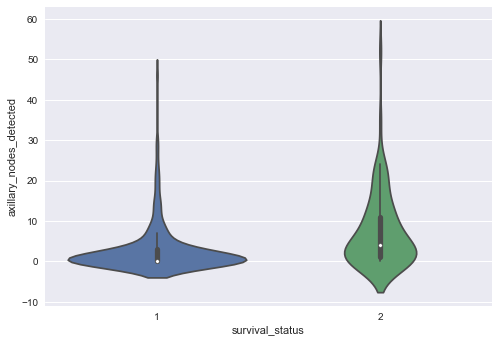

In [62]:
sns.violinplot(x='survival_status',y='axillary_nodes_detected', data=Haberman)
plt.show()

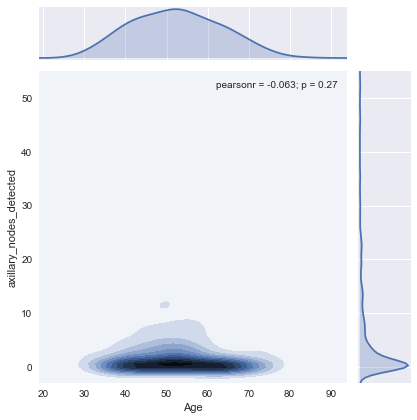

In [65]:
#2D Density plot, contors-plot
sns.jointplot(x="Age", y="axillary_nodes_detected", data=Haberman, kind="kde");
plt.show();

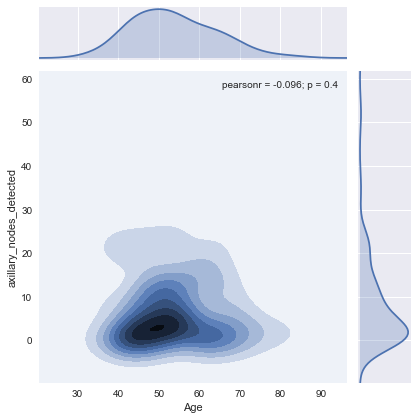

In [66]:
#2D Density plot, contors-plot
sns.jointplot(x="Age", y="axillary_nodes_detected", data=Haberman_Positive, kind="kde");
plt.show();

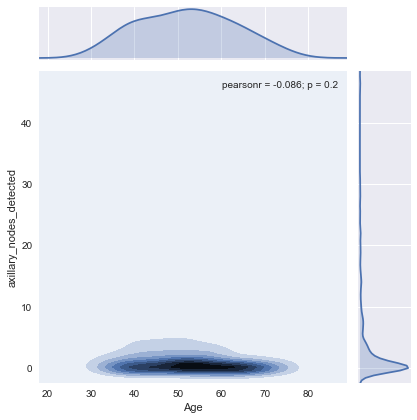

In [67]:
#2D Density plot, contors-plot
sns.jointplot(x="Age", y="axillary_nodes_detected", data=Haberman_Negative, kind="kde");
plt.show();